In [1]:

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(cities)

['hilo', 'labuhan', 'ilulissat', 'panorama', 'laranjeiras do sul', 'ushuaia', 'yining', 'new norfolk', 'amarante do maranhao', 'rikitea', 'barrow', 'taolanaro', 'san juan', 'mataura', 'mahebourg', 'lebu', 'ribeira grande', 'albany', 'pitimbu', 'havelock', 'hermanus', 'hasaki', 'namibe', 'puchezh', 'east london', 'kudahuvadhoo', 'yellowknife', 'samusu', 'thompson', 'kuche', 'charters towers', 'butaritari', 'bredasdorp', 'chuy', 'dikson', 'bluff', 'the valley', 'grand river south east', 'saumur', 'tasiilaq', 'cape town', 'cidreira', 'itarema', 'puerto ayora', 'punta arenas', 'fort nelson', 'concepcion de buenos aires', 'norman wells', 'sorong', 'qasigiannguit', 'port hedland', 'one hundred mile house', 'castro', 'qaanaaq', 'kavaratti', 'pevek', 'severo-kurilsk', 'gamba', 'port alfred', 'coquimbo', 'chhukha', 'nishihara', 'tommot', 'meyungs', 'mtambile', 'barra do garcas', 'hlobyne', 'saleaula', 'guerrero negro', 'bozoum', 'opuwo', 'nikolskoye', 'shchelyayur', 'malisbong', 'bengkulu', 'qu

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
place= 'Paris'


# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q={place}"
query_url 
response = requests.get(query_url).json()
response



{'coord': {'lon': 2.35, 'lat': 48.85},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 16.67,
  'feels_like': 16.74,
  'temp_min': 15.56,
  'temp_max': 18.33,
  'pressure': 1017,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 1.5, 'deg': 0},
 'clouds': {'all': 75},
 'dt': 1599789322,
 'sys': {'type': 1,
  'id': 6550,
  'country': 'FR',
  'sunrise': 1599801723,
  'sunset': 1599847951},
 'timezone': 7200,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [4]:
# set up lists to hold reponse info
lat = [] 
lon = []
temp = []
city_name = []
country =[]
humidity = []
cloudiness = []
windspeed = []
date = []

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric" 

query_url = f"{url}appid={api_key}&units={units}&q="
query_url

 #Loop through the list of cities and perform a request for data on each
for city in cities :
    try:
        response = requests.get(query_url+city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        
        
        
        city_name.append(city)
        print('City name :'+ city)
    except:
        print('Cities not found')
   


City name :hilo
City name :labuhan
City name :ilulissat
City name :panorama
City name :laranjeiras do sul
City name :ushuaia
City name :yining
City name :new norfolk
City name :amarante do maranhao
City name :rikitea
City name :barrow
Cities not found
City name :san juan
City name :mataura
City name :mahebourg
City name :lebu
City name :ribeira grande
City name :albany
City name :pitimbu
City name :havelock
City name :hermanus
City name :hasaki
City name :namibe
City name :puchezh
City name :east london
City name :kudahuvadhoo
City name :yellowknife
Cities not found
City name :thompson
Cities not found
City name :charters towers
City name :butaritari
City name :bredasdorp
City name :chuy
City name :dikson
City name :bluff
City name :the valley
Cities not found
City name :saumur
City name :tasiilaq
City name :cape town
City name :cidreira
City name :itarema
City name :puerto ayora
City name :punta arenas
City name :fort nelson
City name :concepcion de buenos aires
City name :norman well

City name :bethel
City name :mayumba
City name :norden
City name :agirish
City name :yovon
City name :mier
City name :malumfashi
City name :ouadda
City name :las vegas
City name :husavik
City name :codrington
City name :mae sai
City name :pemex
City name :biloxi
City name :bambous virieux
City name :kiama
City name :chicama
City name :kyabe
City name :narsaq
City name :puerto madero
City name :camocim
City name :san patricio
City name :bantry
City name :cervo
City name :namatanai
City name :urumqi
City name :san quintin
Cities not found
City name :leshukonskoye
City name :liberal
City name :gimli
Cities not found
City name :los llanos de aridane
City name :okhotsk
City name :general pico
City name :lagoa
City name :villa guerrero
City name :puerto del rosario
City name :sahuaripa
City name :churachandpur
City name :gunjur
City name :moussoro
Cities not found
City name :front royal
City name :kruisfontein
City name :srednekolymsk
City name :bambanglipuro
City name :kaoma
City name :olut

In [43]:
city_list_df=pd.DataFrame({
    
    'City Name':city_name , 
    'Lon': lon ,
    'Lat': lat, 
    'Country': country, 
    'Humidity' : humidity, 
    'Cloudiness': cloudiness, 
    'Windspeed': windspeed, 
    'Date': date,
    'temp': temp, 
})

city_list_df.head()

#city_list_df.to_csv(output_data_file)


,City Name,Lon,Lat,Country,Humidity,Cloudiness,Windspeed,Date,temp
0,hilo,-155.09,19.73,US,65,90,4.60,1599789897,24.31
1,labuhan,112.21,-6.88,ID,57,11,2.69,1599789999,29.36
2,ilulissat,-51.10,69.22,GL,86,0,2.93,1599789949,0.00
3,panorama,23.03,40.59,GR,83,20,0.69,1599789999,23.08
4,laranjeiras do sul,-52.42,-25.41,BR,73,0,1.86,1599789999,19.14


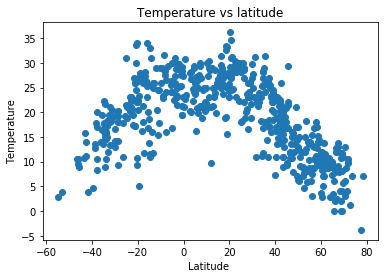

In [65]:
#graficar x = temperature  y = latitude

y_values_temp = city_list_df['temp']

x_values_lat = city_list_df['Lat']


#graficar 
plt.scatter(x_values_lat,y_values_temp)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Temperature')
plt.title('Temperature vs latitude')


#regresion lineal 

#regression ecuation  formula 
#(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat ,y_values_temp)
#regress_values = x_values_lat * slope + intercept
#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
#plt.annotate(line_eq,(10,10),fontsize=15,color="red")
#plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()




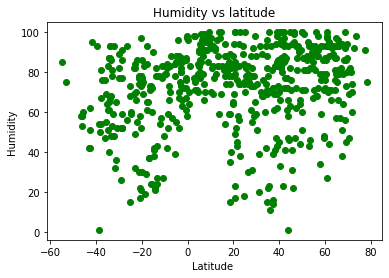

In [66]:
#graficar x = humidity y = latitude

y_values_humidity = city_list_df['Humidity']
x_values_lat = city_list_df['Lat']


#graficar 
plt.scatter(x_values_lat,y_values_humidity, c='green')
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Humidity')
plt.title('Humidity vs latitude')
plt.show()


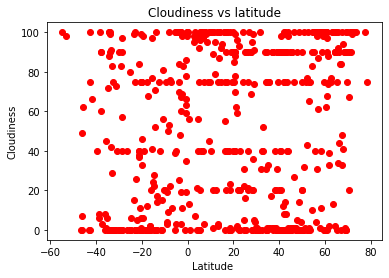

In [67]:
# x = cloudiness y = latitude
y_values_cloud = city_list_df['Cloudiness']
x_values_lat = city_list_df['Lat']


#graficar 
plt.scatter(x_values_lat,y_values_cloud, c='red')
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs latitude')
plt.show()


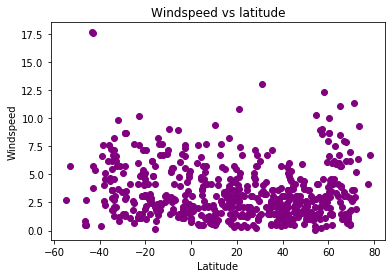

In [68]:
#graficar x = windspeed y = latitude

y_values_windspeed = city_list_df['Windspeed']
x_values_lat = city_list_df['Lat']


#graficar 
plt.scatter(x_values_lat,y_values_windspeed, c='purple')
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude')
plt.ylabel('Windspeed')
plt.title('Windspeed vs latitude')
plt.show()


In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={'162b2a66cc681fa1cfc5174fd0a18700'}&units={units}&q="
query_url  



'http://api.openweathermap.org/data/2.5/weather?appid=162b2a66cc681fa1cfc5174fd0a18700&units=metric&q='

In [70]:
#northern
northern_df = city_list_df.loc[(city_list_df['Lat'] <= 0)]
southern_df = city_list_df.loc[(city_list_df['Lat'] >= 0)]

print(len(northern_df))
print(len(southern_df))
                               
                        
                           

184
376


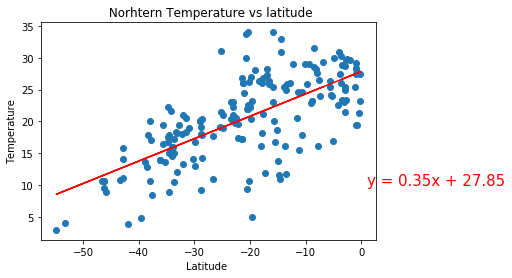

 The r-squared is 0.47254133230011164


In [71]:
# Northern Hemisphere - Temperature (%) vs. Latitude Linear Regression 

y_values_temp_2 = northern_df['temp']

x_values_lat = northern_df['Lat']


#graficar 
plt.scatter(x_values_lat,y_values_temp_2)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Temperature')
plt.title(' Northern Temperature vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat ,y_values_temp_2)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2

print(f" The r-squared is {rvalue**2}")

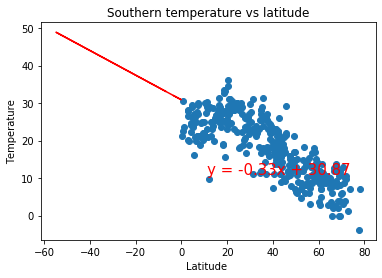

 The r-squared is 0.6500842797613815


In [73]:
# Southern Hemisphere - Temperature (%) vs. Latitude Linear Regression 

y_values_temp_3 = southern_df['temp']

x_values_lat_2 = southern_df['Lat']


#graficar 
plt.scatter(x_values_lat_2,y_values_temp_3)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Temperature')
plt.title('Southern temperature vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_2 ,y_values_temp_3)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(11,11),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")

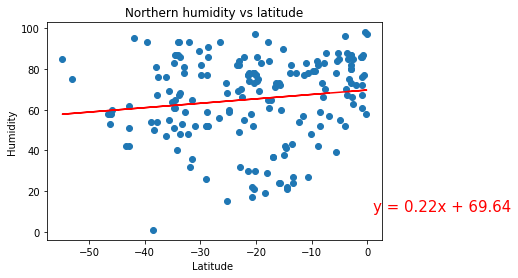

 The r-squared is 0.01891518134347115


In [74]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression 

y_values_temp_4 = northern_df['Humidity']

x_values_lat_3 = northern_df['Lat']


#graficar 
plt.scatter(x_values_lat_3,y_values_temp_4)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Humidity')
plt.title('Northern humidity vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_3 ,y_values_temp_4)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")

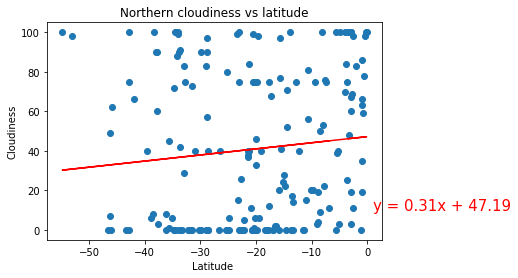

 The r-squared is 0.011210338033808092


In [75]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression 

y_values_temp_5 = northern_df['Cloudiness']

x_values_lat_4 = northern_df['Lat']


#graficar 
plt.scatter(x_values_lat_4,y_values_temp_5)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Cloudiness')
plt.title('Northern cloudiness vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_4 ,y_values_temp_5)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")

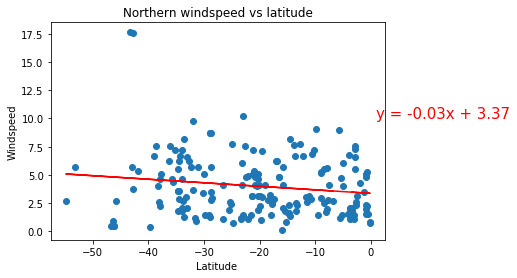

 The r-squared is 0.02302940409404795


In [76]:
# Northern Hemisphere - Wind Speed(%) vs. Latitude Linear Regression 

y_values_temp_5 = northern_df['Windspeed']

x_values_lat_4 = northern_df['Lat']


#graficar 
plt.scatter(x_values_lat_4,y_values_temp_5)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Windspeed')
plt.title('Northern windspeed vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_4 ,y_values_temp_5)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(1,10),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")

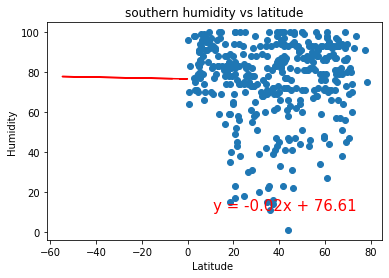

 The r-squared is 0.0005063744946011939


In [77]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression 

y_values_temp_6 = southern_df['Humidity']

x_values_lat_7 = southern_df['Lat']


#graficar 
plt.scatter(x_values_lat_7,y_values_temp_6)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Humidity')
plt.title('southern humidity vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_7 ,y_values_temp_6)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(11,11),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")

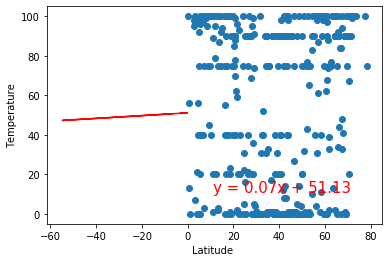

 The r-squared is 0.0012011650459748345


In [63]:
# Southern Hemisphere - 'Cloudiness' vs. Latitude Linear Regression 

y_values_temp_7 = southern_df['Cloudiness']

x_values_lat_8 = southern_df['Lat']


#graficar 
plt.scatter(x_values_lat_8,y_values_temp_7)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('Cloudiness')
plt.title('southern cloudiness vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_8 ,y_values_temp_7)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(11,11),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")

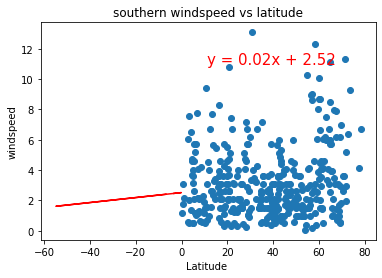

 The r-squared is 0.02076444311376789


In [78]:


# Southern Hemisphere - ''Windspeed' vs. Latitude Linear Regression 

y_values_temp_8 = southern_df['Windspeed']

x_values_lat_9 = southern_df['Lat']


#graficar 
plt.scatter(x_values_lat_9,y_values_temp_8)
#plt.plot(year,vc_fit,"--")
#plt.xticks(year, rotation=90)
plt.xlabel('Latitude ')
plt.ylabel('windspeed')
plt.title('southern windspeed vs latitude')


#regresion lineal 

#regression ecuation  formula 
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values_lat_9 ,y_values_temp_8)
regress_values = x_values_lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#anota la formula de la ecuacion 
plt.annotate(line_eq,(11,11),fontsize=15,color="red")
plt.plot(x_values_lat ,regress_values,"r-")
#grafica la linea de la regresión 

plt.show()

# R2
print(f" The r-squared is {rvalue**2}")